In [1]:
# Relate diffusion (MGH) and histology (BigBrain) features in order to define cortical profile
# Modes of analysis:
# On vertex-wise data do:
# 1. PCA
# 2. KMeans
# 3. CCA
#
# Analysis pipeline to be applied on Left Hemi / Right Hemi / Both (Wholebrain)

# I. Histology (BigBrain Data)
# 1. PCA 

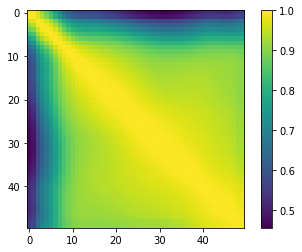

In [196]:
import numpy as np
import matplotlib.pyplot as plt
 
bbDir='/Users/jiewonkang/GIT/bigbrain/' # bigbrain directory

# Load data (vertices x profiles)
# Input data: vertex data extracted to np array
#           : CHANGE REQUIRED: read in gifti directly using nib.load

d=np.load(bbDir+'rh.profiles_merged.npy')
noProfiles=d.shape[0] # No of histology profiles 

# First observe correlation between profiles
c=np.corrcoef(d)
_=plt.figure()
_=plt.imshow(c)
_=plt.colorbar()

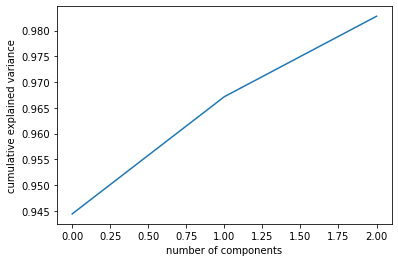

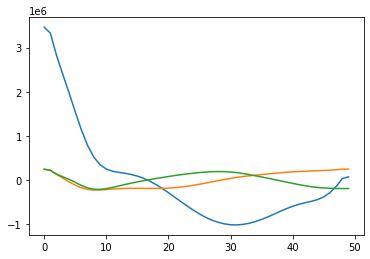

In [197]:
# 1. Do PCA on data 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


ncomponents=3
pipe=Pipeline([('pca',PCA(n_components=ncomponents))])

projected=pipe.fit_transform(d)
pcs=pipe['pca'].components_
variance=pipe['pca'].explained_variance_
ratio=pipe['pca'].explained_variance_ratio_


# No of components required
_=plt.figure()
_=plt.plot(np.cumsum(ratio))
_=plt.xlabel('number of components')
_=plt.ylabel('cumulative explained variance');

# Plot PC weightings
_=plt.figure()
_=plt.plot(projected)
_=plt.xlabel('Features')


In [199]:
# Project PCs back to brainmap
# Map cluster numbers to brain (.gii)
import os 
import nibabel as nib

sampleDir='/Users/jiewonkang/GIT/bigbrain/'
outDir='/Users/jiewonkang/GIT/bigbrain/'
hemi='rh' # Brain hemisphere

for i in range(pcs.shape[0]):
    print('Component number '+str(i+1))
    file=nib.load(os.path.join(sampleDir,'rh.tpl-fsaverage_hemi-R_den-164k_desc-Hist_G1.func.gii')) # Sample gifti
   
    file.darrays[0].data=pcs[i,:]
    outputname=os.path.join(outDir,hemi+'.pc_'+str(i+1)+'.func.gii')
    print(outputname)
    nib.save(file,outputname)



Component number 1
/Users/jiewonkang/GIT/bigbrain/rh.pc_1.func.gii
Component number 2
/Users/jiewonkang/GIT/bigbrain/rh.pc_2.func.gii
Component number 3
/Users/jiewonkang/GIT/bigbrain/rh.pc_3.func.gii


# 2. KMeans clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

nclusters=3
pipe=Pipeline([('scaler',StandardScaler()),('kmeans',KMeans(n_clusters=nclusters,random_state=0))])

newlabels=pipe['kmeans'].labels_
idx      =np.argsort(newlabels)
_=plt.figure()
c=np.corrcoef(d[idx,:])
_=plt.imshow(c)
_=plt.colorbar()

# Unconcatenate features / Look at cortical profiles for each cluster
# colour coded plot using cluster assignments

col=['r','b','k','g'] # Colours for clusters(3)
_=plt.figure(figsize=(15,15))
for j in range(np.size(values)):
    _=plt.subplot(3,3,j+1)
    for i in range(nclusters):
        _=plt.plot(d[newlabels==i,6*j:6*j+6].T,'-x',c=col[i])
    
    _=plt.xticks(ticks=np.arange(0,6),labels=layers)
    _=plt.xlabel('Layers')
    _=plt.ylabel(values[j])
    #_=plt.legend(labels,bbox_to_anchor=(1.05, 1.0), loc='upper left')


# II. Diffusion features

# 1. PCA

# Data Structure:
# a. (Layers x single feature) x Vertices
# b. (Layers x all features) x Vertices

rh.f1_merged.npy
(6, 142386)
rh.f2_merged.npy
(6, 142386)
rh.f3_merged.npy
(6, 142386)
rh.L1_merged.npy
(6, 142386)
rh.L2_merged.npy
(6, 142386)
rh.L3_merged.npy
(6, 142386)
rh.FA_merged.npy
(6, 142386)
rh.MD_merged.npy
(6, 142386)
rh.t1_over_t2_merged.npy
(6, 142386)


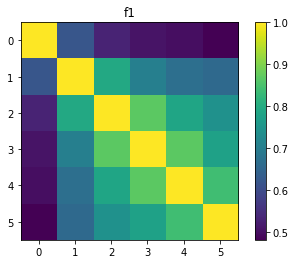

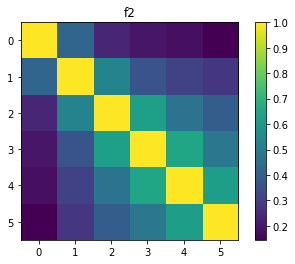

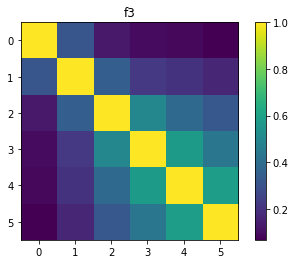

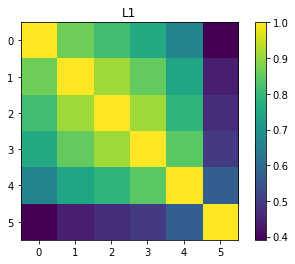

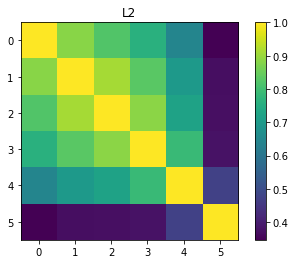

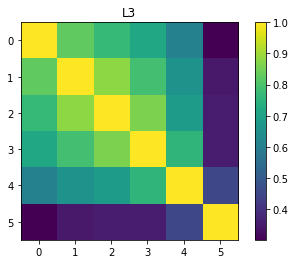

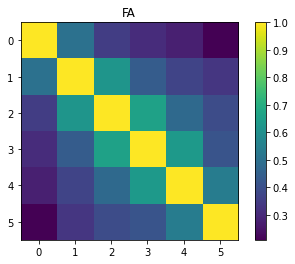

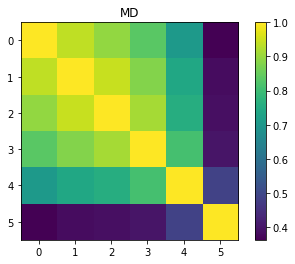

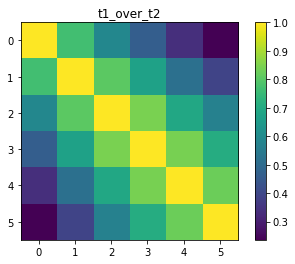

In [206]:
# Load Diffusion features
# a. Separate features in data matrix

diffDir='/Users/jiewonkang/GIT/diffusion/merged/'
hemi='rh.'
features=['f1','f2','f3','L1','L2','L3','FA','MD','t1_over_t2']

dat={} # Initialise dictionary to store data 
for i in features:
    fileName=hemi+i+'_merged.npy'
    print(fileName)
    d=np.load(os.path.join(diffDir,fileName))
    print(d.shape)
    
    # Observe correlation
    c=np.corrcoef(d)
    _=plt.figure()
    _=plt.imshow(c)
    _=plt.colorbar()
    _=plt.title(i)
    
    # Save as dictionary
    dat[i]=d


In [203]:
print(dat['f1'].shape)

(6, 142386)


In [ ]:
sampDir='/Users/jiewonkang/GIT/bigbrain/'
outdir='/Users/jiewonkang/GIT/diffusion/merged/'
# A. Run PCA
# B. Plot PC weights
# C. Save first PC as brain map (gifti func file)
# D. Correlation coeff of diffusion 1st PC v. histology 1st PC 

ncomponents=3
pipe=Pipeline([('pca',PCA(n_components=ncomponents))])

for i in features:
    d=dat[i]
    print(d.shape)
    
    # A. Fit PCA model
    projected_diff=pipe.fit_transform(d) 
    # Save params
    pcs_diff=pipe['pca'].components_
    variance_diff=pipe['pca'].explained_variance_
    ratio_diff=pipe['pca'].explained_variance_ratio_
    print(ratio_diff)

    # B. Plot PC weights
    _=plt.figure()
    _=plt.plot(projected_diff)
    _=plt.xlabel('Features')
    
    # C. Save first PC as brain map
    sampFile=nib.load(os.path.join(sampDir,'rh.tpl-fsaverage_hemi-R_den-164k_desc-Hist_G1.func.gii')) # Sample gifti
   
    sampFile.darrays[0].data=pcs_diff[0,:] # 1st PC
    outFile=hemi+i+'_pc1.func.gii'
    print(outFile)
    nib.save(sampFile,os.path.join(outdir,outFile))
    
    # D. Get correlation betweenf 1st PC in diff v. hist
    arr=np.array((pcs_diff[0,:],pcs[0,:]))
    print(np.corrcoef(arr))
    

In [156]:
# Project PCs back to brainmap
# Map cluster numbers to brain (.gii)
import os 
import nibabel as nib

indir='/Users/jiewonkang/GIT/bigbrain/'
outdir='/Users/jiewonkang/GIT/diffusion/'

print(pcs_diff.shape)
for i in range(pcs_diff.shape[0]):
    print('Component number '+str(i+1))
    file=nib.load(os.path.join(indir,'rh.tpl-fsaverage_hemi-R_den-164k_desc-Hist_G1.func.gii')) # Sample gifti
   
    file.darrays[0].data=pcs_diff[i,:]
    outputname=os.path.join(outdir,'rh.diff_pc_'+str(i+1)+'.func.gii')
    nib.save(file,outputname)


(3, 142386)
Component number 1
Component number 2
Component number 3


# b. For data with all diffusion features concatenated

(54, 142386)
(54, 3)
[0.80035293 0.10103264 0.03681863]
(3, 142386)
(3,)
(3,)
rh.diff_feat_merged_pc1.func.gii
[[1.         0.08738571]
 [0.08738571 1.        ]]


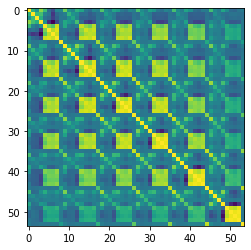

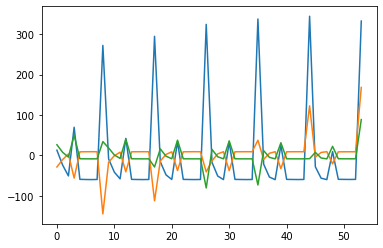

In [190]:
indir='/Users/jiewonkang/GIT/diffusion/merged/'
sampDir='/Users/jiewonkang/GIT/diffusion/'
d=np.load(os.path.join(indir,'rh.diff_feat_merged.npy'))
print(d.shape)
    
# Observe correlation
c=np.corrcoef(d)
_=plt.figure()
_=plt.imshow(c)

# Save params
projected_diff=pipe.fit_transform(d) # Fit PCA model
pcs_diff=pipe['pca'].components_
variance_diff=pipe['pca'].explained_variance_
ratio_diff=pipe['pca'].explained_variance_ratio_
print(projected_diff.shape)

print(ratio_diff)

# Plot weights of PC
_=plt.figure()
_=plt.plot(projected_diff)
    
# Save first PC as brain map
sampFile=nib.load(os.path.join(sampDir,'R.layer_0.0.f1.func.gii')) # Sample gifti
   
sampFile.darrays[0].data=pcs_diff[0,:] # 1st PC
outFile=hemi+'diff_feat_merged'+'_pc1.func.gii'
print(outFile)
nib.save(sampFile,os.path.join(outdir,outFile))
    
# Correlation betweenf 1st PC in diff v. hist
arr=np.array((pcs_diff[0,:],pcs[0,:]))
print(np.corrcoef(arr))


# III. Diffusion features v. Histology profiles

In [141]:
# Comparison

for i in range(pcs_diff.shape[0]): # Diffusion
    print('Diffusion PC:'+str(i+1))
    for j in range(pcs.shape[0]): # Histology
        print('Histolgoy PC:'+str(j+1))
        arr=np.array((pcs_diff[i,:],pcs[j,:])) 
        print(np.corrcoef(arr))
    

(3, 142386)
(3, 142386)
(2, 142386)
0
(2, 142386)
[[1.         0.02597568]
 [0.02597568 1.        ]]
(2, 142386)
[[1.         0.00368799]
 [0.00368799 1.        ]]
(2, 142386)
[[ 1.         -0.11647799]
 [-0.11647799  1.        ]]
1
(2, 142386)
[[ 1.         -0.11275019]
 [-0.11275019  1.        ]]
(2, 142386)
[[1.        0.0283934]
 [0.0283934 1.       ]]
(2, 142386)
[[1.         0.12273175]
 [0.12273175 1.        ]]
2
(2, 142386)
[[ 1.         -0.26974795]
 [-0.26974795  1.        ]]
(2, 142386)
[[ 1.         -0.18095109]
 [-0.18095109  1.        ]]
(2, 142386)
[[1.        0.0426814]
 [0.0426814 1.       ]]


In [140]:
# Load sample PCs from BBW
sampDir='/Users/jiewonkang/GIT/bigbrain/'
file=nib.load(os.path.join(sampDir,'rh.tpl-fsaverage_hemi-R_den-164k_desc-Hist_G1.func.gii'))
pc1_bb=file.darrays[0].data

x=np.array(pc1_bb)

# Correlation with my PCs
np.corrcoef(np.array((pcs[0,:].T,x)))

array([[1.        , 0.46372936],
       [0.46372936, 1.        ]])